In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import zarr

In [ ]:
BASEPATH = '/scratch/pa2439/Projects/single_cell_imaging/canvas'

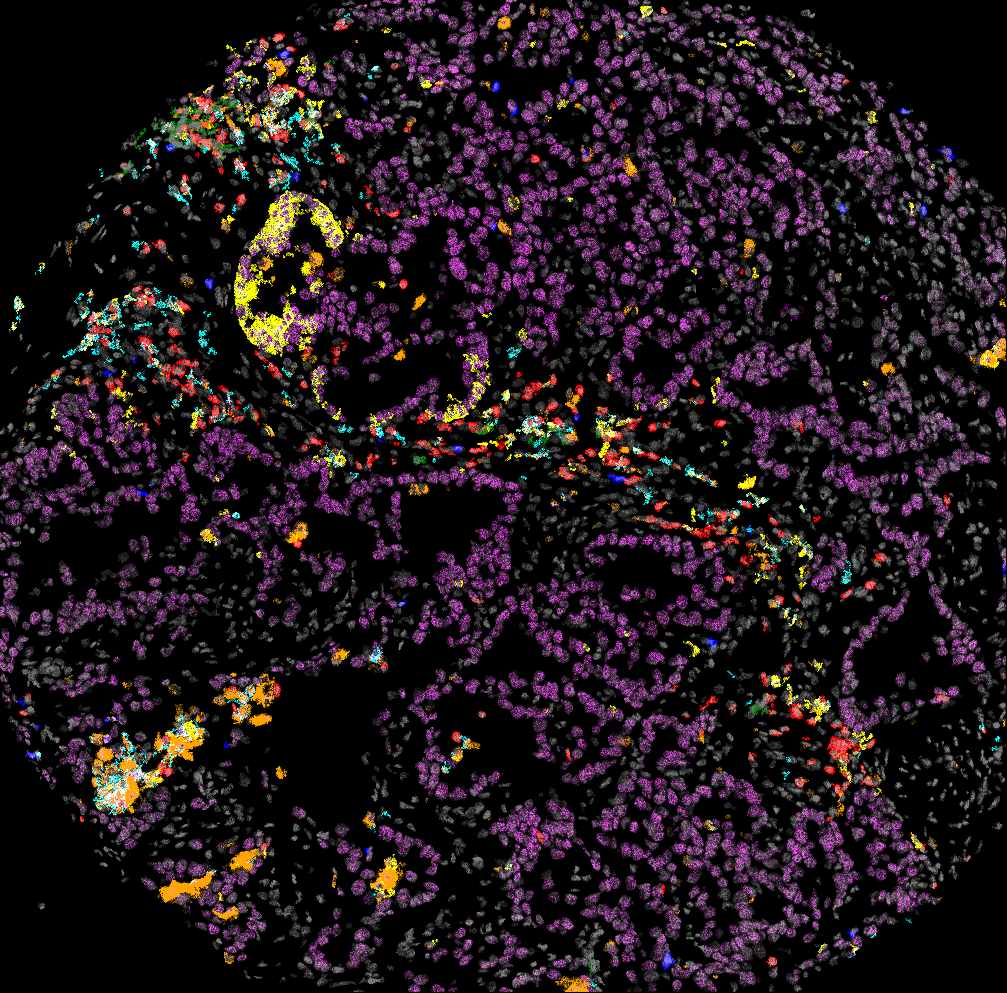

In [3]:
Image(f"{BASEPATH}/canvas_examples/Sorin_2023/data/processed_data/data/LUAD_D010/visualization/sample.png", width=300)

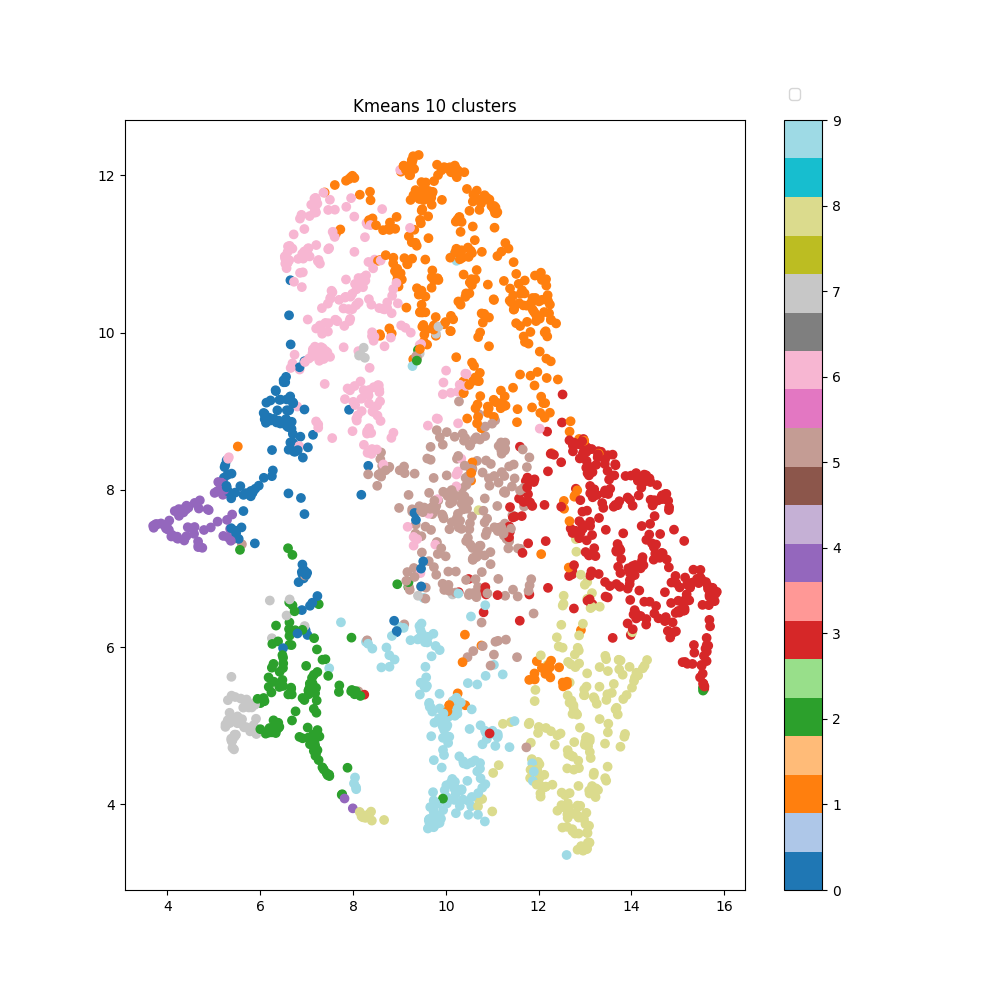

In [4]:
from IPython.display import Image
Image(f'{BASEPATH}/canvas_examples/Sorin_2023/data/analysis/kmeans/10/clusters.png', width=500)

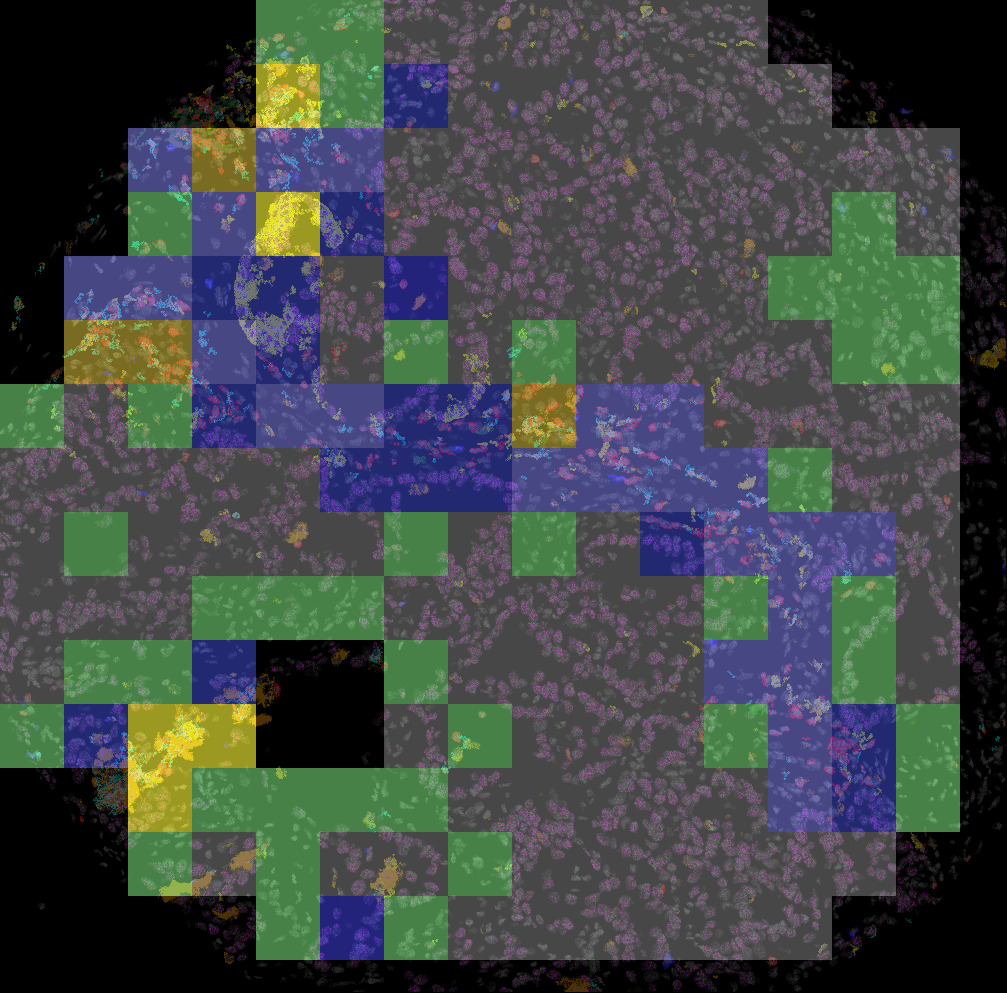

In [5]:
Image(f'{BASEPATH}/canvas_examples/Sorin_2023/data/analysis/sample_visualization/10/LUAD_D010/n_cluster/10/cluster_on_color.png', width=300)

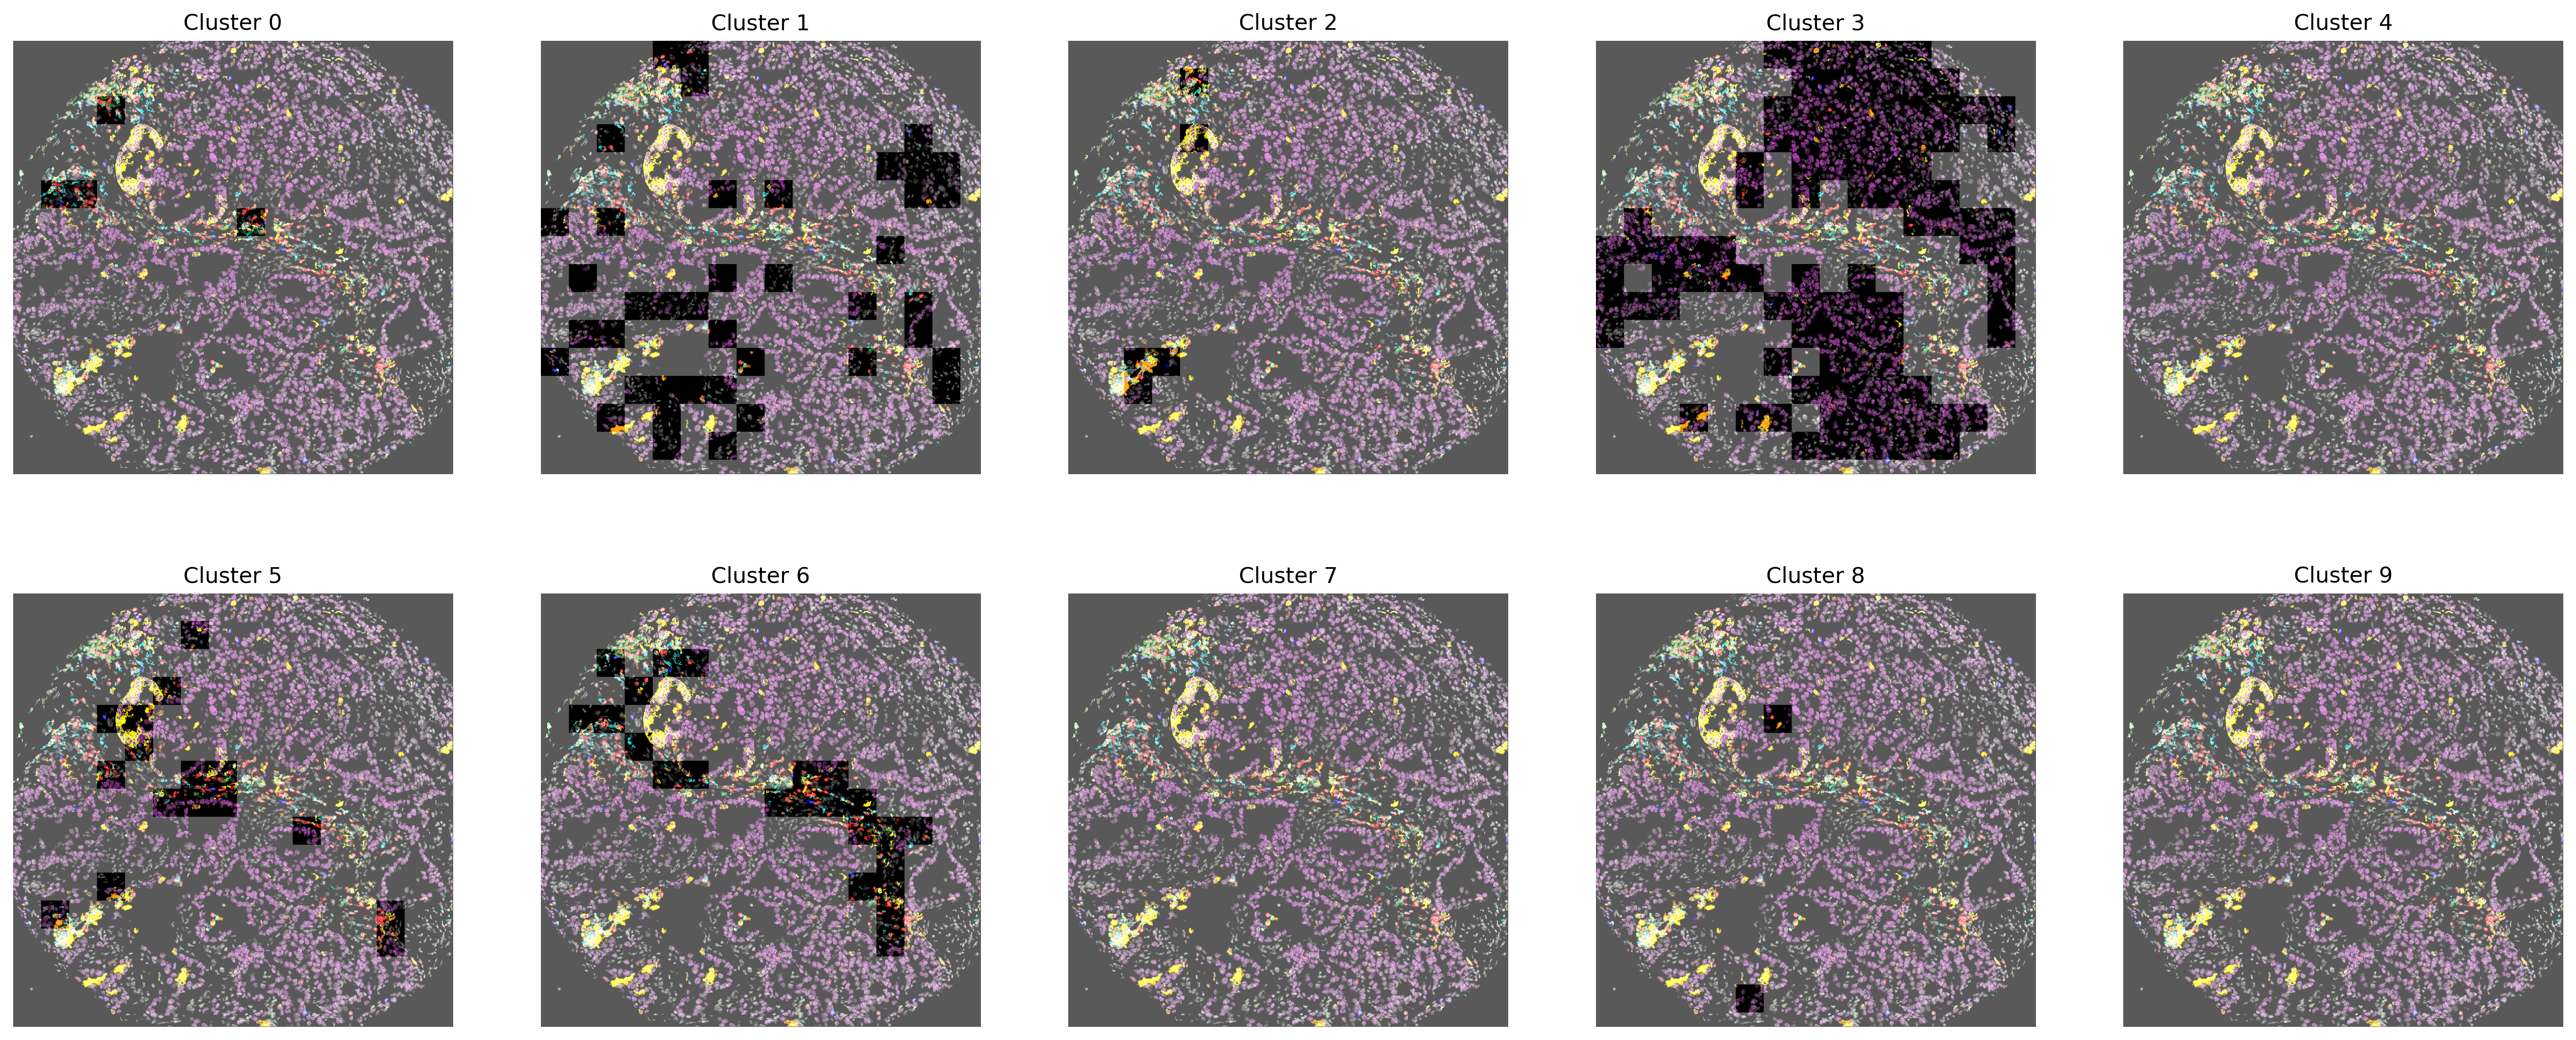

In [6]:
Image(f'{BASEPATH}/canvas_examples/Sorin_2023/data/analysis/sample_visualization/10/LUAD_D010/n_cluster/10/cluster_on_color_by_cluster.png', width=800)

In [7]:
data = np.load(f"{BASEPATH}/canvas_examples/Sorin_2023/data/analysis/tile_embedding/embedding_mean.npy")

In [8]:
data.shape

(1902, 1024)

In [9]:
clusterinfo = np.load("/scratch/pa2439/Projects/single_cell_imaging/canvas/canvas_examples/Sorin_2023/data/analysis/kmeans/10/clusters.npy")

In [10]:
clusterinfo.shape

(1902,)

In [9]:
luad_locs = np.load(f"{BASEPATH}/canvas_examples/Sorin_2023/data/analysis/tile_embedding/tile_location.npy")

In [10]:
luad_name = np.load(f"{BASEPATH}/canvas_examples/Sorin_2023/data/analysis/tile_embedding/sample_name.npy")

In [11]:
luad_tile_dict = {'luad': luad_name, 'x': luad_locs.T[0], 'y': luad_locs.T[1]}
pd.DataFrame(luad_tile_dict)

luad    x    y
0     LUAD_D002    0    0
1     LUAD_D002    0   64
2     LUAD_D002    0  128
3     LUAD_D002    0  384
4     LUAD_D002    0  448
...         ...  ...  ...
1897  LUAD_D006  896  320
1898  LUAD_D006  896  384
1899  LUAD_D006  896  448
1900  LUAD_D006  896  512
1901  LUAD_D006  896  576

[1902 rows x 3 columns]

In [12]:
# luad02 = zarr.open("/scratch/pa2439/Projects/single_cell_imaging/canvas/canvas_examples/Sorin_2023/data/processed_data/data/LUAD_D002/data.zarr", mode='r')

In [13]:
LUAD_PATH = "/scratch/pa2439/Projects/single_cell_imaging/canvas/canvas_examples/Sorin_2023/data/processed_data/data/"

In [14]:
import umap.umap_ as umap
projection = umap.UMAP(n_components=3)
umap_3d_data = projection.fit_transform(data)

projection_2d = umap.UMAP(n_components=2)
umap_2d_data = projection_2d.fit_transform(data)

In [50]:
temp = zarr.open("./results/Sorin/LUAD_D007.zarr", mode='r')
temp

<zarr.core.Array (18, 200, 64, 64) uint16 read-only>

In [23]:
LUADS = {}
NEW_LUAD = {}
LUAD_TABLE = {}
LUAD_TABLE_UMAP_3D = {}
LUAD_TABLE_UMAP_2D = {}
for s in set(luad_name):
    LUADS[s] = zarr.open(LUAD_PATH + s + "/data.zarr", mode='r')
    NEW_LUAD[s] = []
    LUAD_TABLE[s] = {'index': [], 'embedding': []}
    LUAD_TABLE_UMAP_3D[s] = {'index': [], 'embedding': []}
    LUAD_TABLE_UMAP_2D[s] = {'index': [], 'embedding': []}

for i in range(len(luad_name)):
    luad = luad_name[i]
    x = luad_locs[i][0]
    y = luad_locs[i][1]
    NEW_LUAD[luad].append(LUADS[luad][:, x:(x+64), y:(y+64)].astype("uint16"))
    LUAD_TABLE[luad]['index'].append(len(NEW_LUAD[luad])-1)
    LUAD_TABLE[luad]['embedding'].append(data[i])
    LUAD_TABLE_UMAP_3D[luad]['index'].append(len(NEW_LUAD[luad])-1)
    LUAD_TABLE_UMAP_3D[luad]['embedding'].append(umap_3d_data[i])
    LUAD_TABLE_UMAP_2D[luad]['index'].append(len(NEW_LUAD[luad])-1)
    LUAD_TABLE_UMAP_2D[luad]['embedding'].append(umap_2d_data[i])

In [51]:
for i in NEW_LUAD:
    zarr.save("./results/Sorin/" + i + ".zarr", zarr.array(np.moveaxis(NEW_LUAD[i], 1, 0), chunks=(100, 100), dtype="uint16"))

In [25]:
for i in LUAD_TABLE:
    pd.DataFrame(LUAD_TABLE[i]).to_csv("./results/Sorin/" + i + "_1024_dim.csv", sep='\t')

In [26]:
for i in LUAD_TABLE_UMAP_3D:
    pd.DataFrame(LUAD_TABLE_UMAP_3D[i]).to_csv("./results/Sorin/" + i + "_3_dim.csv", sep='\t')
    pd.DataFrame(LUAD_TABLE_UMAP_2D[i]).to_csv("./results/Sorin/" + i + "_2_dim.csv", sep='\t')

In [ ]:
LUADS = {}
NEW_LUAD = []
LUAD_POSITIONS = {'LUAD': [], 'position': []}
LUAD_TABLE = {'LUAD': [],'index': [], 'embedding': []}
LUAD_TABLE_UMAP_3D = {'LUAD': [],'index': [], 'embedding': []}
LUAD_TABLE_UMAP_2D = {'LUAD': [],'index': [], 'embedding': []}

offset = {}

for i, s in enumerate(set(luad_name)):
    LUADS[s] = zarr.open(LUAD_PATH + s + "/data.zarr", mode='r')
    dims = np.shape(LUADS[s])[1:3]
    offset[s] = [dims[0] * , dims[1] * ]
    # NEW_LUAD[s] = []

for i in range(len(luad_name)):
    luad = luad_name[i]
    x = luad_locs[i][0]
    y = luad_locs[i][1]
    NEW_LUAD[luad].append(LUADS[luad][:, x:(x+64), y:(y+64)].astype("uint16"))

    LUAD_POSITIONS['LUAD'].append(luad)
    LUAD_POSITIONS['position'].append([x])
    
    LUAD_TABLE['LUAD'].append(luad)
    LUAD_TABLE['index'].append(len(NEW_LUAD[luad])-1)
    LUAD_TABLE['embedding'].append(data[i])
    LUAD_TABLE_UMAP_3D['LUAD'].append(luad)
    LUAD_TABLE_UMAP_3D['index'].append(len(NEW_LUAD[luad])-1)
    LUAD_TABLE_UMAP_3D['embedding'].append(umap_3d_data[i])
    LUAD_TABLE_UMAP_2D['LUAD'].append(luad)
    LUAD_TABLE_UMAP_2D['index'].append(len(NEW_LUAD[luad])-1)
    LUAD_TABLE_UMAP_2D['embedding'].append(umap_2d_data[i])